# Project Kanjonavo Sabud

In [1]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Install (or reinstall) ReservoirPy in the current Jupyter environment
%pip install reservoirpy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
ReservoirPy version: 0.3.13post1


In [ ]:
# Verify the import and version
import reservoirpy
print("ReservoirPy version:", reservoirpy.__version__)

# 1993

In [3]:
# importing lorenz1963 dataset function and the ESN model
from reservoirpy.datasets import lorenz
from reservoirpy.nodes import Reservoir, Ridge

In [4]:
# obtaining lorenz63 data for 5000 discrete time steps
n_timesteps = 5000
data = lorenz(n_timesteps)

In [5]:
def plot_lorenz_attractor(data, verbose=True):
    fig = plt.figure(figsize=(10, 8))
    x, y, z = data.T
    
    # 3D plot
    ax = fig.add_subplot(projection='3d')
    ax.plot(x, y, z, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Lorenz Attractor")
    
    if verbose:
        # Time series plots
        fig, (ax_x, ax_y, ax_z) = plt.subplots(3, 1, figsize=(10, 12))
        ax_x.plot(x, lw=0.5)
        ax_x.set_ylabel("x")
        ax_y.plot(y, lw=0.5)
        ax_y.set_ylabel("y")
        ax_z.plot(z, lw=0.5)
        ax_z.set_ylabel("z")
        ax_z.set_xlabel("Time")
    
    plt.show()

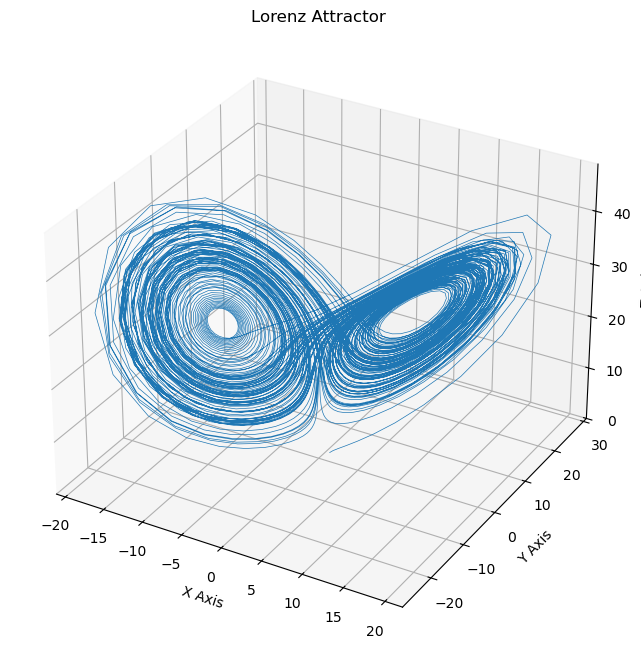

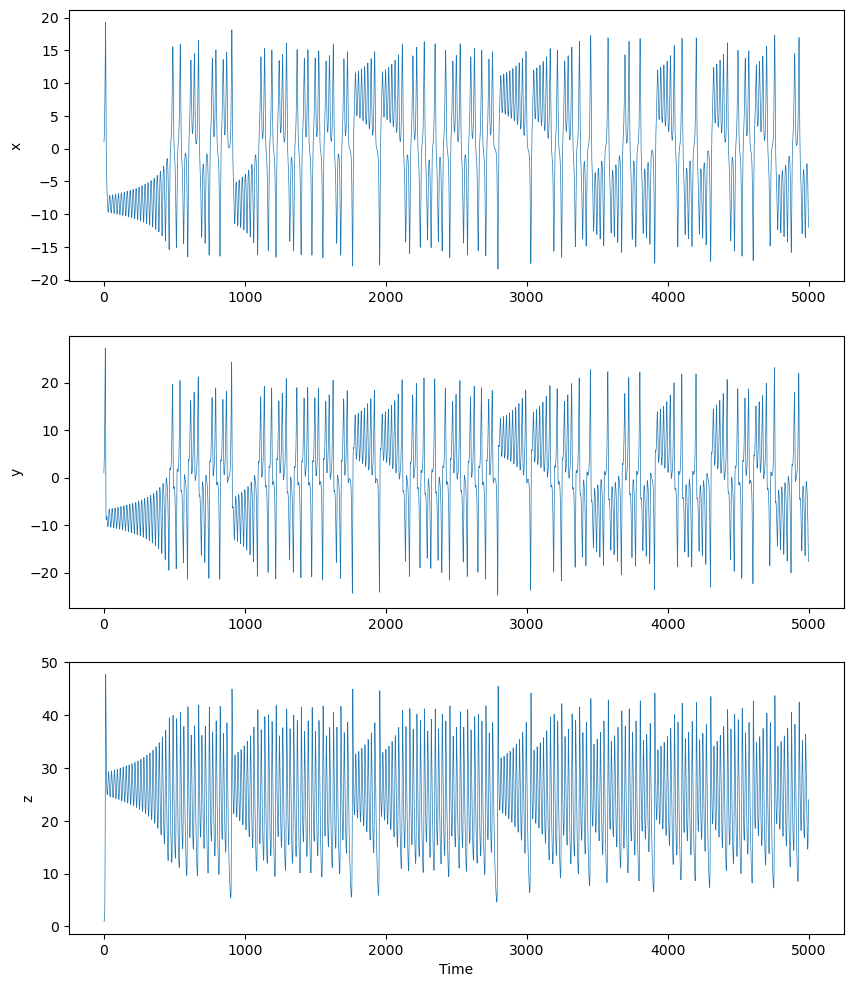

In [6]:
plot_lorenz_attractor(data)

In [7]:
# Training and Testing Data
train_len = 4000
test_len  = 1000

train_data = data[:train_len]
test_data  = data[train_len : train_len + test_len + 1]

# Formating the Training dataset for input to ESN
X_train = train_data[:-1]
X_test = train_data[1:] + [[0, 0, 0]]

# Creating the ESN Model using the given example code
reservoir = Reservoir(300, lr=0.5, sr=0.9)
ridge = Ridge(output_dim=3, ridge=1e-7)

esn_model = reservoir >> ridge

# Training and Running the model and getting predictions
esn_model = esn_model.fit(X_train, X_test)
predicted_data = esn_model.run(test_data)

Running Model-0:   0%|          | 0/1 [00:00<?, ?it/s]
Running Model-0: 3999it [00:00, 23488.04it/s]         
Running Model-0: 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


Fitting node Ridge-0...


Running Model-0: 1000it [00:00, 24957.48it/s]         
